In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from tqdm.notebook import tnrange,tqdm
import pandas as pd
import os

import warnings
warnings.filterwarnings("ignore")

In [3]:
from diffusion_simulation import diffusion_simulation
from network import network

In [4]:
def print_metrics(sim_id, is_no0):
    params = {'sim_id':sim_id, 'alpha':0.1, 'beta':3.5,
          'noise_dist': 'logistic', 'noise_dist_param': 1,
          'cnt_iter': 100000, 't_warmup':1000, 'is_traj':False, 
          'is_network_given':True, 'network_dir':f'../instances/{sim_id}/edge.csv',  
          'is_value_given':True, 'value_dir':f'../instances/{sim_id}/v.csv'
         }
    G = network(params)
    
    df = pd.read_csv(f'../instances/{sim_id}/results.csv')

    if is_no0:
        is_not_0 = G.in_degree > 0
    
        if G.n<len(df):
            df = df[:G.n]
        df_1 = df[is_not_0]
        mape = np.mean(np.abs(df_1['sim']-df_1['fp'])/df_1['sim'])
        
        G.cal_mean_inv_indeg()
        pd.DataFrame({'n':[G.n], 'd_mean':[np.mean(G.in_degree)], 'inv_ind_density':[np.mean(1/G.in_degree[is_not_0])], 
                      'mape':[mape]}
                    ).to_csv(f'../instances/{sim_id}/metrics_no0.csv', index=None)
    else:
        mape = np.mean(np.abs(df['sim']-df['fp'])/df['sim'])
        
        G.cal_mean_inv_indeg()
        pd.DataFrame({'n':[G.n], 'd_min':[np.min(G.in_degree_adj)], 'd_max':[np.max(G.in_degree)], 
                     'd_mean':[np.mean(G.in_degree)], 'out_in_ratio': [np.max(G.out_degree)/max(np.min(G.in_degree),1)], 
                     'deg_corr':[np.corrcoef(G.in_degree, G.out_degree)[0,1]],
                     'inv_ind_density':[G.ave_inv_indeg], 
                      'mape':[mape]}
                    ).to_csv(f'../instances/{sim_id}/metrics.csv', index=None)

In [7]:
dict_density = {'1_n13': lambda n:1/n**1.3,
                '1_n11': lambda n:1/n**1.1,
                '1_n': lambda n:1/n, 
                'sqrtlogn_n': lambda n:np.sqrt(np.log(n))/n,
                'logn_n': lambda n:np.log(n)/n, 
                'logn2_n': lambda n:np.log(n)**2/n,
                '1': lambda n: 0.1}

dict_real = {'caltech': 'Caltech36', 
             'reed': 'Reed98', 
             'haverford': 'Haverford76', 
             'simmons': 'Simmons81', 
             'amherst': 'Amherst41'}

dict_alpha = {'25': 2.5,
              '30': 3,
              '35': 3.5}

dict_theta = {'neg10': -1,
              'neg05': -0.5,
              'pos05': 0.5,
              'pos10':1}

In [9]:
rep = 1 # For illustration purposes, generate one repetition. To fully replicate the result in the paper, change this to 50.
l_n = [20, 50, 100, 200, 500, 1000, 2000, 5000, 10000] # Network size
l_pn1 = ['1_n11', '1_n', 'logn2_n', '1'] # ER Network density 1
l_pn2 = ['1_n13', 'sqrtlogn_n', 'logn_n'] # ER Network density 2
l_pn = ['1_n13', '1_n11', '1_n', 'sqrtlogn_n', 'logn_n', 'logn2_n', '1']
l_alpha = ['25', '30', '35'] # PL Network exponent
l_theta = ['neg05', 'pos05', 'neg10', 'pos10'] # PL Network correlation
l_real = ['caltech', 'reed', 'haverford', 'simmons', 'amherst'] # Real-world network
l_t_iter = [100, 1000] # Resample times

## __Figure 3__: Performance of ER graph (with varying network size)

### Generate one instance for each ER graph parameter pair

In [11]:
for pn in l_pn1:
    for n in l_n:
        for i in range(1,rep+1):
            sim_id = f'ER_{pn}/n{n}_{i}'
            os.makedirs(f'../instances/{sim_id}', exist_ok=True)
            params = {'sim_id':sim_id, 'alpha':0.1, 'beta':3.5,
                      'noise_dist': 'logistic', 'noise_dist_param':1,
                      'cnt_iter': 100000, 't_warmup':1000, 'is_traj':False, 
                      'network_type': 'ER',
                      'is_network_given':False, 'network_size': n, 'ER_prob':dict_density[pn](n), 'network_dir':'',
                      'is_value_given':False, 'v_dist':'uniform_neg', 'v_dist_param': 4, 'value_dir':''
                     }
            
            G = network(params)
            sample = diffusion_simulation(G,params)
            sample.start_diffusion()
            sample.run_fixed_point()
            sample.output()

Instance generated with 20 nodes.
Instance generated with 50 nodes.
Instance generated with 100 nodes.
Instance generated with 200 nodes.
Instance generated with 500 nodes.
Instance generated with 1000 nodes.
Instance generated with 2000 nodes.
Instance generated with 5000 nodes.
Instance generated with 10000 nodes.
Instance generated with 20 nodes.
Instance generated with 50 nodes.
Instance generated with 100 nodes.
Instance generated with 200 nodes.
Instance generated with 500 nodes.
Instance generated with 1000 nodes.
Instance generated with 2000 nodes.
Instance generated with 5000 nodes.
Instance generated with 10000 nodes.
Instance generated with 20 nodes.
Instance generated with 50 nodes.
Instance generated with 100 nodes.
Instance generated with 200 nodes.
Instance generated with 500 nodes.
Instance generated with 1000 nodes.
Instance generated with 2000 nodes.
Instance generated with 5000 nodes.
Instance generated with 10000 nodes.
Instance generated with 20 nodes.
Instance gen

### Calculate the statistics

In [12]:
for pn in l_pn1:
    for n in l_n:
        for i in range(1,rep+1):
            print_metrics(f'ER_{pn}/n{n}_{i}', True)
            print_metrics(f'ER_{pn}/n{n}_{i}', False)

Instance generated with 20 nodes.
Instance generated with 20 nodes.
Instance generated with 50 nodes.
Instance generated with 50 nodes.
Instance generated with 100 nodes.
Instance generated with 100 nodes.
Instance generated with 199 nodes.
Instance generated with 199 nodes.
Instance generated with 499 nodes.
Instance generated with 499 nodes.
Instance generated with 999 nodes.
Instance generated with 999 nodes.
Instance generated with 1998 nodes.
Instance generated with 1998 nodes.
Instance generated with 5000 nodes.
Instance generated with 5000 nodes.
Instance generated with 10000 nodes.
Instance generated with 10000 nodes.
Instance generated with 20 nodes.
Instance generated with 20 nodes.
Instance generated with 50 nodes.
Instance generated with 50 nodes.
Instance generated with 100 nodes.
Instance generated with 100 nodes.
Instance generated with 200 nodes.
Instance generated with 200 nodes.
Instance generated with 500 nodes.
Instance generated with 500 nodes.
Instance generated w

In [13]:
dict_results = dict()

for pn in l_pn1:
    rec_mape, rec_inv_deg, rec_mean_inv = [], [], []
    for n in l_n:
        mape, inv_deg, mean_inv  = [], [], []
        for i in range(1,rep+1):
            df = pd.read_csv(f'../instances/ER_{pn}/n{n}_{i}/metrics_no0.csv')
            mape.append(df['mape'].values[0]*100)
            inv_deg.append(df['inv_ind_density'].values[0])
            mean_inv.append(1/df['d_mean'].values[0])
        rec_mape.append(mape)
        rec_inv_deg.append(inv_deg)
        rec_mean_inv.append(mean_inv)

    dict_results[(pn,'mape')] = rec_mape
    dict_results[(pn,'inv_deg')] = rec_inv_deg
    dict_results[(pn,'mean_inv')] = rec_mean_inv
    

### Replicate Figure 3

(0.0, 35.0)

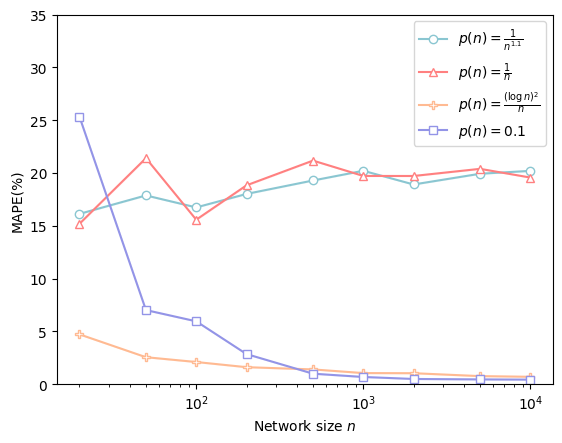

In [15]:
# size
plt.plot(l_n, np.mean(dict_results[('1_n11','mape')],axis=1), c='#8ac6d1', marker='o', markerfacecolor='white', label='$p(n)=\\frac{1}{n^{1.1}}$')
plt.fill_between(l_n, np.quantile(dict_results[('1_n11','mape')],0.05,axis=1), np.quantile(dict_results[('1_n11','mape')],0.95,axis=1), color='#8ac6d1', alpha=0.1)
plt.plot(l_n, np.mean(dict_results[('1_n','mape')],axis=1), c='#ff8080', marker='^', markerfacecolor='white', label='$p(n)=\\frac{1}{n}$')
plt.fill_between(l_n, np.quantile(dict_results[('1_n','mape')],0.05,axis=1), np.quantile(dict_results[('1_n','mape')],0.95,axis=1), color='#ff8080', alpha=0.1)
plt.plot(l_n, np.mean(dict_results[('logn2_n','mape')],axis=1), c='#ffba92', marker='P', markerfacecolor='white', label='$p(n)=\\frac{(\\log n)^2}{n}$')
plt.fill_between(l_n, np.quantile(dict_results[('logn2_n','mape')],0.05,axis=1), np.quantile(dict_results[('logn2_n','mape')],0.95,axis=1), color='#ffba92', alpha=0.1)
plt.plot(l_n, np.mean(dict_results[('1','mape')],axis=1), c='#9394e7', marker='s', markerfacecolor='white', label='$p(n)=0.1$')
plt.fill_between(l_n, np.quantile(dict_results[('1','mape')],0.05,axis=1), np.quantile(dict_results[('1','mape')],0.95,axis=1), color='#9394e7', alpha=0.1)
plt.xscale("log")
plt.legend()
plt.xlabel('Network size $n$')
plt.ylabel('MAPE(%)')
plt.ylim(0,35)

(-0.01, 1.0)

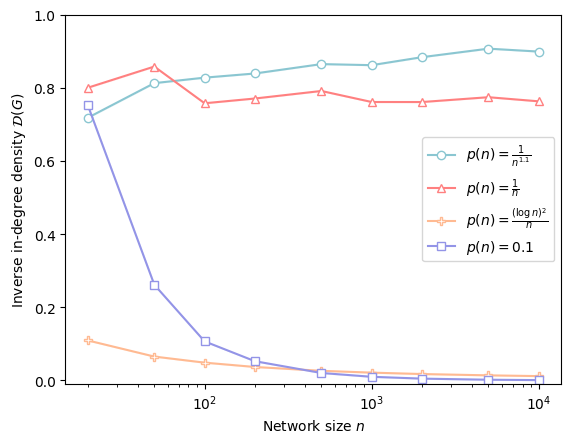

In [16]:
# size
plt.plot(l_n, np.mean(dict_results[('1_n11','inv_deg')],axis=1), c='#8ac6d1', marker='o', markerfacecolor='white', label='$p(n)=\\frac{1}{n^{1.1}}$')
plt.fill_between(l_n, np.quantile(dict_results[('1_n11','inv_deg')],0.05,axis=1), np.quantile(dict_results[('1_n11','inv_deg')],0.95,axis=1), color='#8ac6d1', alpha=0.1)
plt.plot(l_n, np.mean(dict_results[('1_n','inv_deg')],axis=1), c='#ff8080', marker='^', markerfacecolor='white', label='$p(n)=\\frac{1}{n}$')
plt.fill_between(l_n, np.quantile(dict_results[('1_n','inv_deg')],0.05,axis=1), np.quantile(dict_results[('1_n','inv_deg')],0.95,axis=1), color='#ff8080', alpha=0.1)
plt.plot(l_n, np.mean(dict_results[('logn2_n','inv_deg')],axis=1), c='#ffba92', marker='P', markerfacecolor='white', label='$p(n)=\\frac{(\\log n)^2}{n}$')
plt.fill_between(l_n, np.quantile(dict_results[('logn2_n','inv_deg')],0.05,axis=1), np.quantile(dict_results[('logn2_n','inv_deg')],0.95,axis=1), color='#ffba92', alpha=0.1)
plt.plot(l_n, np.mean(dict_results[('1','inv_deg')],axis=1), c='#9394e7', marker='s', markerfacecolor='white', label='$p(n)=0.1$')
plt.fill_between(l_n, np.quantile(dict_results[('1','inv_deg')],0.05,axis=1), np.quantile(dict_results[('1','inv_deg')],0.95,axis=1), color='#9394e7', alpha=0.1)
plt.xscale("log")
plt.legend()
plt.xlabel('Network size $n$')
plt.ylabel('Inverse in-degree density $\mathcal{D}(G)$')
plt.ylim(-0.01,1)

Text(0, 0.5, 'Inverse of mean in-degree')

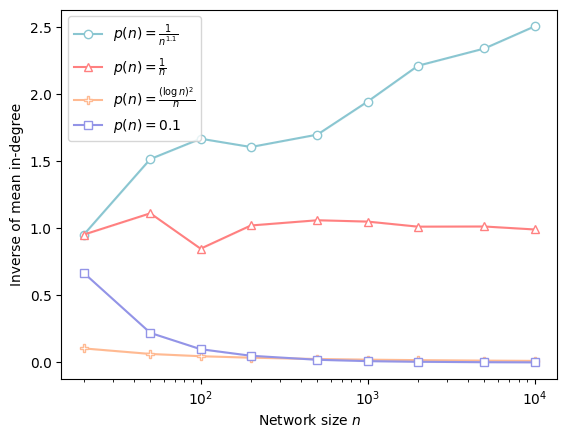

In [17]:
# size
plt.plot(l_n, np.mean(dict_results[('1_n11','mean_inv')],axis=1), c='#8ac6d1', marker='o', markerfacecolor='white', label='$p(n)=\\frac{1}{n^{1.1}}$')
plt.fill_between(l_n, np.quantile(dict_results[('1_n11','mean_inv')],0.05,axis=1), np.quantile(dict_results[('1_n11','mean_inv')],0.95,axis=1), color='#8ac6d1', alpha=0.1)
plt.plot(l_n, np.mean(dict_results[('1_n','mean_inv')],axis=1), c='#ff8080', marker='^', markerfacecolor='white', label='$p(n)=\\frac{1}{n}$')
plt.fill_between(l_n, np.quantile(dict_results[('1_n','mean_inv')],0.05,axis=1), np.quantile(dict_results[('1_n','mean_inv')],0.95,axis=1), color='#ff8080', alpha=0.1)
plt.plot(l_n, np.mean(dict_results[('logn2_n','mean_inv')],axis=1), c='#ffba92', marker='P', markerfacecolor='white', label='$p(n)=\\frac{(\\log n)^2}{n}$')
plt.fill_between(l_n, np.quantile(dict_results[('logn2_n','mean_inv')],0.05,axis=1), np.quantile(dict_results[('logn2_n','mean_inv')],0.95,axis=1), color='#ffba92', alpha=0.1)
plt.plot(l_n, np.mean(dict_results[('1','mean_inv')],axis=1), c='#9394e7', marker='s', markerfacecolor='white', label='$p(n)=0.1$')
plt.fill_between(l_n, np.quantile(dict_results[('1','mean_inv')],0.05,axis=1), np.quantile(dict_results[('1','mean_inv')],0.95,axis=1), color='#9394e7', alpha=0.1)
plt.xscale("log")
plt.legend()
plt.xlabel('Network size $n$')
plt.ylabel('Inverse of mean in-degree')

## __Figure 4__: Performance of ER graph (with varying network density) 

### Generate one instance for each __additional__ ER graph parameter pair

In [20]:
n = 1000
for pn in l_pn2:
    for i in range(1,rep+1):
        sim_id = f'ER_{pn}/n{n}_{i}'
        os.makedirs(f'../instances/{sim_id}', exist_ok=True)
        params = {'sim_id':sim_id, 'alpha':0.1, 'beta':3.5,
                  'noise_dist': 'logistic', 'noise_dist_param':1,
                  'cnt_iter': 100000, 't_warmup':1000, 'is_traj':False, 
                  'network_type': 'ER',
                  'is_network_given':False, 'network_size': n, 'ER_prob':dict_density[pn](n), 'network_dir':'',
                  'is_value_given':False, 'v_dist':'uniform_neg', 'v_dist_param': 4, 'value_dir':''
                  }
            
        G = network(params)
        sample = diffusion_simulation(G,params)
        sample.start_diffusion()
        sample.run_fixed_point()
        sample.output()


Instance generated with 1000 nodes.
Instance generated with 1000 nodes.
Instance generated with 1000 nodes.


### Calculate the statistics

In [22]:
for pn in l_pn2:
    for i in range(1,rep+1):
        print_metrics(f'ER_{pn}/n{n}_{i}', True)
        print_metrics(f'ER_{pn}/n{n}_{i}', False)    

Instance generated with 999 nodes.
Instance generated with 999 nodes.
Instance generated with 1000 nodes.
Instance generated with 1000 nodes.
Instance generated with 1000 nodes.
Instance generated with 1000 nodes.


In [23]:
dict_results = dict()

rec_mape, rec_inv_deg, rec_mean_inv = [], [], []
for pn in l_pn:
    mape, inv_deg, mean_inv  = [], [], []
    for i in range(1,rep+1):
        df = pd.read_csv(f'../instances/ER_{pn}/n{n}_{i}/metrics_no0.csv')
        mape.append(df['mape'].values[0]*100)
        inv_deg.append(df['inv_ind_density'].values[0])
        mean_inv.append(1/df['d_mean'].values[0])
    rec_mape.append(mape)
    rec_inv_deg.append(inv_deg)
    rec_mean_inv.append(mean_inv)

dict_results[(n,'mape')] = rec_mape
dict_results[(n,'inv_deg')] = rec_inv_deg
dict_results[(n,'mean_inv')] = rec_mean_inv
    

### Replicate Figure 4

([<matplotlib.axis.XTick at 0x26e8b531040>,
 [Text(1, 0, '$\\frac{1}{n^{1.3}}$'),
  Text(2, 0, '$\\frac{1}{n^{1.1}}$'),
  Text(3, 0, '$\\frac{1}{n}$'),
  Text(4, 0, '$\\frac{\\sqrt{\\log{n}}}{n}$'),
  Text(5, 0, '$\\frac{\\log{n}}{n}$'),
  Text(6, 0, '$\\frac{(\\log{n})^2}{n}$'),
  Text(7, 0, '$0.1$')])

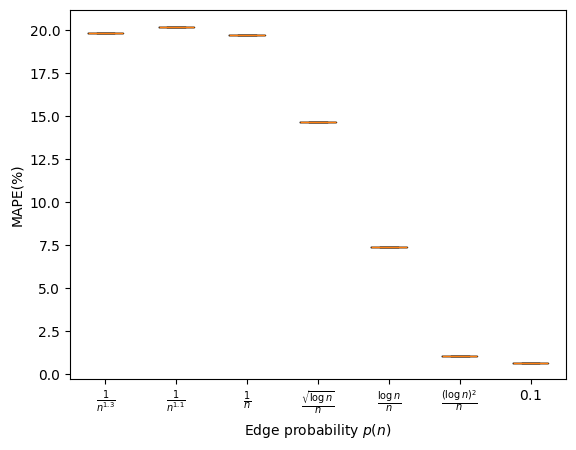

In [25]:
plt.boxplot(dict_results[(n,'mape')])
plt.xlabel('Edge probability $p(n)$')
plt.ylabel('MAPE(%)')
plt.xticks([1,2,3,4,5,6,7],['$\\frac{1}{n^{1.3}}$', '$\\frac{1}{n^{1.1}}$', '$\\frac{1}{n}$', '$\\frac{\\sqrt{\\log{n}}}{n}$', '$\\frac{\\log{n}}{n}$','$\\frac{(\\log{n})^2}{n}$', '$0.1$'])

([<matplotlib.axis.XTick at 0x26e8bb6c1a0>,
 [Text(1, 0, '$\\frac{1}{n^{1.3}}$'),
  Text(2, 0, '$\\frac{1}{n^{1.1}}$'),
  Text(3, 0, '$\\frac{1}{n}$'),
  Text(4, 0, '$\\frac{\\sqrt{\\log{n}}}{n}$'),
  Text(5, 0, '$\\frac{\\log{n}}{n}$'),
  Text(6, 0, '$\\frac{(\\log{n})^2}{n}$'),
  Text(7, 0, '$0.1$')])

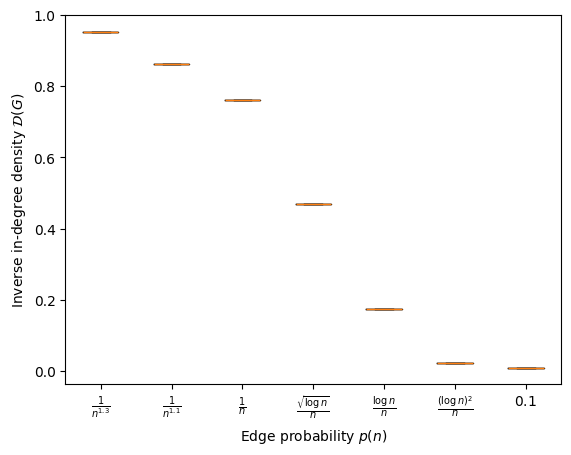

In [26]:
plt.boxplot(dict_results[(n,'inv_deg')])
plt.xlabel('Edge probability $p(n)$')
plt.ylabel('Inverse in-degree density $\mathcal{D}(G)$')
plt.xticks([1,2,3,4,5,6,7],['$\\frac{1}{n^{1.3}}$', '$\\frac{1}{n^{1.1}}$', '$\\frac{1}{n}$', '$\\frac{\\sqrt{\\log{n}}}{n}$', '$\\frac{\\log{n}}{n}$','$\\frac{(\\log{n})^2}{n}$', '$0.1$'])

([<matplotlib.axis.XTick at 0x26e819e1fa0>,
 [Text(1, 0, '$\\frac{1}{n^{1.3}}$'),
  Text(2, 0, '$\\frac{1}{n^{1.1}}$'),
  Text(3, 0, '$\\frac{1}{n}$'),
  Text(4, 0, '$\\frac{\\sqrt{\\log{n}}}{n}$'),
  Text(5, 0, '$\\frac{\\log{n}}{n}$'),
  Text(6, 0, '$\\frac{(\\log{n})^2}{n}$'),
  Text(7, 0, '$0.1$')])

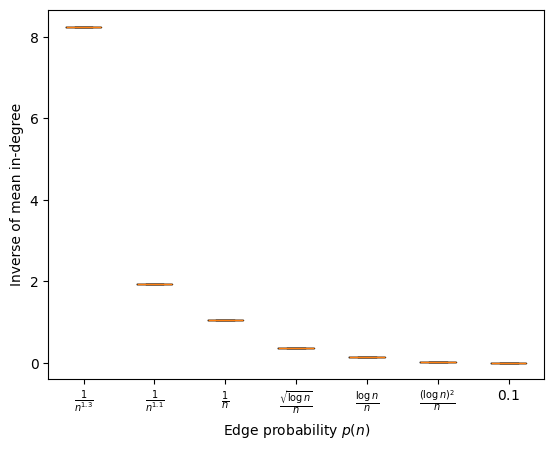

In [27]:
plt.boxplot(dict_results[(n,'mean_inv')])
plt.xlabel('Edge probability $p(n)$')
plt.ylabel('Inverse of mean in-degree')
plt.xticks([1,2,3,4,5,6,7],['$\\frac{1}{n^{1.3}}$', '$\\frac{1}{n^{1.1}}$', '$\\frac{1}{n}$', '$\\frac{\\sqrt{\\log{n}}}{n}$', '$\\frac{\\log{n}}{n}$','$\\frac{(\\log{n})^2}{n}$', '$0.1$'])

## __Table 1__: Efficiency of ER Graph

### Generate one instance for each ER graph parameter pair __with trajectory__

In [30]:
pn = '1'
for n in l_n:
    for i in range(1,rep+1):
        sim_id = f'ER_{pn}_keep_traj/n{n}_{i}'
        os.makedirs(f'../instances/{sim_id}', exist_ok=True)
        params = {'sim_id':sim_id, 'alpha':0.1, 'beta':3.5,
                  'noise_dist': 'logistic', 'noise_dist_param':1,
                  'cnt_iter': 100000, 't_warmup':1000, 'is_traj':True, 
                  'network_type': 'ER',
                  'is_network_given':False, 'network_size': n, 'ER_prob':0.1, 'network_dir':'',
                  'is_value_given':False, 'v_dist':'uniform_neg', 'v_dist_param': 4, 'value_dir':''
                 }
        
        G = network(params)
        sample = diffusion_simulation(G,params)
        sample.start_diffusion()
        sample.run_fixed_point()
        sample.output()

Instance generated with 20 nodes.
Instance generated with 50 nodes.
Instance generated with 100 nodes.
Instance generated with 200 nodes.
Instance generated with 500 nodes.
Instance generated with 1000 nodes.
Instance generated with 2000 nodes.
Instance generated with 5000 nodes.
Instance generated with 10000 nodes.


### Compute the efficiency

In [32]:
for n in l_n:
    print('Network size:', n)
    t_fpa, t_p, t_sim = [], [], []
    for i in range(1,rep+1):
        sim_id = f'ER_1_keep_traj/n{n}_{i}'
        df_traj = pd.read_csv(f'../instances/{sim_id}/results_traj.csv')
        df = pd.read_csv(f'../instances/{sim_id}/results.csv')
        mape = np.mean(np.abs(df['sim']-df['fp'])/df['sim'])
        t = pd.read_csv(f'../instances/{sim_id}/t.csv')['fp'][0]
        t_fpa.append(t)
        
        is_p = False
        
        for t in range(200):
            t1 = t*500+1
            if (np.mean(np.abs(df['sim']-df_traj[f'p_{t1}'])/df['sim']) < mape) and not is_p:
                t_p.append(df_traj[f't_{t1}'][0])
                is_p = True
            if np.mean(np.abs(df['sim']-df_traj[f'sim_{t1}'])/df['sim']) < mape:
                t_sim.append(df_traj[f't_{t1}'][0])
                break

    
    print('FPA time:', np.mean(t_fpa))
    print('A-ABS time:', np.mean(t_p))
    print('Naive ABS time:', np.mean(t_sim))
    print('=======================================================')

Network size: 20
FPA time: 0.0
A-ABS time: 0.0549893379211425
Naive ABS time: 0.0549893379211425
Network size: 50
FPA time: 0.0009999275207519
A-ABS time: 0.103999376296997
Naive ABS time: 0.103999376296997
Network size: 100
FPA time: 0.0039999485015869
A-ABS time: 0.1865677833557129
Naive ABS time: 0.2515707015991211
Network size: 200
FPA time: 0.0070068836212158
A-ABS time: 0.3520762920379638
Naive ABS time: 0.8210594654083252
Network size: 500
FPA time: 0.0170018672943115
A-ABS time: 0.8766152858734131
Naive ABS time: 7.84783935546875
Network size: 1000
FPA time: 0.0440001487731933
A-ABS time: 1.7770869731903076
Naive ABS time: 34.397719383239746
Network size: 2000
FPA time: 0.1259911060333252
A-ABS time: 5.036928176879883
Naive ABS time: 112.4040412902832
Network size: 5000
FPA time: 0.3527140617370605
A-ABS time: 47.32983303070069
Naive ABS time: 449.8416464328766
Network size: 10000
FPA time: 0.9852128028869628
A-ABS time: 104.47542762756348
Naive ABS time: 1179.8197848796844


## __Table 2__: Real-world network

### Construct real-world network edge information

In [35]:
for real in l_real:
    network_name = dict_real[real]
    os.makedirs(f'../instances/{real}', exist_ok=True)
    df = pd.read_csv(f'../instances/{network_name}.txt',sep=' ', names=['from_edge', 'to_edge'])
    df_1 = df.copy()
    df_1['from_edge'], df_1['to_edge'] = df['to_edge'], df['from_edge']
    # build a undirected graph
    pd.concat([df,df_1], ignore_index=True).to_csv(f'../instances/{real}/edge.csv', index=None)

### Generate one instance for each real-world network

In [37]:
for real in l_real:
    for i in range(1,rep+1):
        sim_id = f'{real}/sim_{i}'
        os.makedirs(f'../instances/{sim_id}', exist_ok=True)
        params = {'sim_id':sim_id, 'alpha':0.1, 'beta':3.5,
                  'noise_dist': 'logistic', 'noise_dist_param':1,
                  'cnt_iter': 100000, 't_warmup':1000, 'is_traj':False, 
                  'is_network_given':True, 'network_dir':f'../instances/{real}/edge.csv',
                  'is_value_given':False, 'v_dist':'uniform_neg', 'v_dist_param': 4
                 }
        
        G = network(params)
        sample = diffusion_simulation(G,params)
        sample.start_diffusion()
        sample.run_fixed_point()
        sample.output()

Instance generated with 770 nodes.
Instance generated with 963 nodes.
Instance generated with 1447 nodes.
Instance generated with 1519 nodes.
Instance generated with 2236 nodes.


### Calculate the statistics

In [39]:
for real in l_real:
    for i in range(1,rep+1):
        print_metrics(f'{real}/sim_{i}', False)    

Instance generated with 770 nodes.
Instance generated with 963 nodes.
Instance generated with 1447 nodes.
Instance generated with 1519 nodes.
Instance generated with 2236 nodes.


In [40]:
for real in l_real:
    print('Real-world network:', real)
    mape = []
    for i in range(1,rep+1):
        sim_id = f'{real}/sim_{i}'
        df = pd.read_csv(f'../instances/{sim_id}/metrics.csv')
        mape.append(df['mape'].values[0])
    
    print('n:', df['n'].values[0])
    print('dmin:', df['d_min'].values[0])
    print('dmax:', df['d_max'].values[0])
    print('dbar:', df['d_mean'].values[0])
    print('D(G):', df['inv_ind_density'].values[0])
    print('mape:', np.mean(mape))
    print('=======================================================')

Real-world network: caltech
n: 770
dmin: 1.0
dmax: 248.0
dbar: 43.262337
D(G): 0.110780314656047
mape: 0.0315235216979828
Real-world network: reed
n: 963
dmin: 1.0
dmax: 313.0
dbar: 39.069572
D(G): 0.0962060787719853
mape: 0.0298090087166243
Real-world network: haverford
n: 1447
dmin: 1.0
dmax: 375.0
dbar: 82.36213
D(G): 0.0426727748362047
mape: 0.0163139941149651
Real-world network: simmons
n: 1519
dmin: 1.0
dmax: 300.0
dbar: 43.433838
D(G): 0.0857362326546041
mape: 0.0302664125385646
Real-world network: amherst
n: 2236
dmin: 1.0
dmax: 467.0
dbar: 81.3542
D(G): 0.0488171210655799
mape: 0.0164890237219055


### Compute the efficiency

In [42]:
for real in l_real:
    for i in range(1,rep+1):
        sim_id = f'{real}_keep_traj/sim_{i}'
        os.makedirs(f'../instances/{sim_id}', exist_ok=True)
        params = {'sim_id':sim_id, 'alpha':0.1, 'beta':3.5,
                  'noise_dist': 'logistic', 'noise_dist_param':1,
                  'cnt_iter': 100000, 't_warmup':1000, 'is_traj':True, 
                  'network_type': 'ER',
                  'is_network_given':True, 'network_dir':f'../instances/{real}/edge.csv',
                  'is_value_given':False, 'v_dist':'uniform_neg', 'v_dist_param': 4
                 }
        
        G = network(params)
        sample = diffusion_simulation(G,params)
        sample.start_diffusion()
        sample.run_fixed_point()
        sample.output()

Instance generated with 770 nodes.
Instance generated with 963 nodes.
Instance generated with 1447 nodes.
Instance generated with 1519 nodes.
Instance generated with 2236 nodes.


In [43]:
for real in l_real:
    print('Network:', real)
    
    sim_id = f'{real}_keep_traj/sim_{i}'
    df_traj = pd.read_csv(f'../instances/{sim_id}/results_traj.csv')
    df = pd.read_csv(f'../instances/{sim_id}/results.csv')
    mape = np.mean(np.abs(df['sim']-df['fp'])/df['sim'])
    t = pd.read_csv(f'../instances/{sim_id}/t.csv')['fp'][0]
    print('FPA time:', t)
    
    is_p = False
    
    for t in range(200):
        t1 = t*500+1
        if (np.mean(np.abs(df['sim']-df_traj[f'p_{t1}'])/df['sim']) < mape) and not is_p:
            print('A-ABS time:', df_traj[f't_{t1}'][0])
            is_p = True
        if np.mean(np.abs(df['sim']-df_traj[f'sim_{t1}'])/df['sim']) < mape:
            print('Naive ABS time:', df_traj[f't_{t1}'][0])
            break
    print('=======================================================')

Network: caltech
FPA time: 0.0439164638519287
A-ABS time: 1.3682401180267334
Naive ABS time: 2.7120490074157715
Network: reed
FPA time: 0.0409998893737793
A-ABS time: 1.6494758129119873
Naive ABS time: 3.843491792678833
Network: haverford
FPA time: 0.0644619464874267
A-ABS time: 2.552570581436157
Naive ABS time: 14.497770071029665
Network: simmons
FPA time: 0.06400728225708
A-ABS time: 2.583631992340088
Naive ABS time: 6.019253492355347
Network: amherst
FPA time: 0.1007575988769531
A-ABS time: 3.955587387084961
Naive ABS time: 18.5039644241333


## __Figure 5__: FPA performance vs $\mathcal{D}(G)$

### Generate one instance for each power-law graph parameter pair

In [46]:
theta = '0'
for alpha in l_alpha:
    for n in l_n:
        for i in range(1,rep+1):
            sim_id = f'PL_alpha{alpha}_theta{theta}/n{n}_{i}'
            os.makedirs(f'../instances/{sim_id}', exist_ok=True)
            params = {'sim_id':sim_id, 'alpha':0.1, 'beta':3.5,
                      'noise_dist': 'logistic', 'noise_dist_param':1,
                      'cnt_iter': 100000, 't_warmup':1000, 'is_traj':False, 
                      'network_type': 'PL',
                      'is_network_given':False, 'network_size': n, 'PL_exponent':dict_alpha[alpha], 'PL_corr':0, 'PL_xmin':2, 'network_dir':'',
                      'is_value_given':False, 'v_dist':'uniform_neg', 'v_dist_param': 4, 'value_dir':''
                     }
            
            G = network(params)
            sample = diffusion_simulation(G,params)
            sample.start_diffusion()
            sample.run_fixed_point()
            sample.output()

Instance generated with 20 nodes.
Instance generated with 50 nodes.
Instance generated with 100 nodes.
Instance generated with 200 nodes.
Instance generated with 500 nodes.
Instance generated with 1000 nodes.
Instance generated with 2000 nodes.
Instance generated with 5000 nodes.
Instance generated with 10000 nodes.
Instance generated with 20 nodes.
Instance generated with 50 nodes.
Instance generated with 100 nodes.
Instance generated with 200 nodes.
Instance generated with 500 nodes.
Instance generated with 1000 nodes.
Instance generated with 2000 nodes.
Instance generated with 5000 nodes.
Instance generated with 10000 nodes.
Instance generated with 20 nodes.
Instance generated with 50 nodes.
Instance generated with 100 nodes.
Instance generated with 200 nodes.
Instance generated with 500 nodes.
Instance generated with 1000 nodes.
Instance generated with 2000 nodes.
Instance generated with 5000 nodes.
Instance generated with 10000 nodes.


In [47]:
alpha = '25'
for theta in l_theta:
    for n in l_n:
        for i in range(1,rep+1):
            sim_id = f'PL_alpha{alpha}_theta{theta}/n{n}_{i}'
            os.makedirs(f'../instances/{sim_id}', exist_ok=True)
            params = {'sim_id':sim_id, 'alpha':0.1, 'beta':3.5,
                      'noise_dist': 'logistic', 'noise_dist_param':1,
                      'cnt_iter': 100000, 't_warmup':1000, 'is_traj':False, 
                      'network_type': 'PL',
                      'is_network_given':False, 'network_size': n, 'PL_exponent':2.5, 'PL_corr':dict_theta[theta], 'PL_xmin':2, 'network_dir':'',
                      'is_value_given':False, 'v_dist':'uniform_neg', 'v_dist_param': 4, 'value_dir':''
                     }
            
            G = network(params)
            sample = diffusion_simulation(G,params)
            sample.start_diffusion()
            sample.run_fixed_point()
            sample.output()

Instance generated with 20 nodes.
Instance generated with 50 nodes.
Instance generated with 100 nodes.
Instance generated with 200 nodes.
Instance generated with 500 nodes.
Instance generated with 1000 nodes.
Instance generated with 2000 nodes.
Instance generated with 5000 nodes.
Instance generated with 10000 nodes.
Instance generated with 20 nodes.
Instance generated with 50 nodes.
Instance generated with 100 nodes.
Instance generated with 200 nodes.
Instance generated with 500 nodes.
Instance generated with 1000 nodes.
Instance generated with 2000 nodes.
Instance generated with 5000 nodes.
Instance generated with 10000 nodes.
Instance generated with 20 nodes.
Instance generated with 50 nodes.
Instance generated with 100 nodes.
Instance generated with 200 nodes.
Instance generated with 500 nodes.
Instance generated with 1000 nodes.
Instance generated with 2000 nodes.
Instance generated with 5000 nodes.
Instance generated with 10000 nodes.
Instance generated with 20 nodes.
Instance gen

### Calculate the statistics

In [49]:
for alpha in l_alpha:
    for n in l_n:
        for i in range(1,rep+1):
            print_metrics(f'PL_alpha{alpha}_theta0/n{n}_{i}', False)
for theta in l_theta:
    for n in l_n:
        for i in range(1,rep+1):
            print_metrics(f'PL_alpha25_theta{theta}/n{n}_{i}', False)

Instance generated with 20 nodes.
Instance generated with 50 nodes.
Instance generated with 100 nodes.
Instance generated with 200 nodes.
Instance generated with 500 nodes.
Instance generated with 1000 nodes.
Instance generated with 2000 nodes.
Instance generated with 5000 nodes.
Instance generated with 10000 nodes.
Instance generated with 20 nodes.
Instance generated with 50 nodes.
Instance generated with 100 nodes.
Instance generated with 200 nodes.
Instance generated with 500 nodes.
Instance generated with 1000 nodes.
Instance generated with 2000 nodes.
Instance generated with 5000 nodes.
Instance generated with 10000 nodes.
Instance generated with 20 nodes.
Instance generated with 50 nodes.
Instance generated with 100 nodes.
Instance generated with 200 nodes.
Instance generated with 500 nodes.
Instance generated with 1000 nodes.
Instance generated with 2000 nodes.
Instance generated with 5000 nodes.
Instance generated with 10000 nodes.
Instance generated with 20 nodes.
Instance gen

In [50]:
dict_results = dict()

rec_mape, rec_inv_deg = [], []
for real in l_real:
    mape, inv_deg  = [], []
    for i in range(1,rep+1):
        df = pd.read_csv(f'../instances/{real}/sim_{i}/metrics.csv')
        mape.append(df['mape'].values[0]*100)
        inv_deg.append(df['inv_ind_density'].values[0])
    rec_mape.append(mape)
    rec_inv_deg.append(inv_deg)

dict_results[('real','mape')] = rec_mape
dict_results[('real','inv_deg')] = rec_inv_deg
    

In [51]:
for pn in l_pn1:
    rec_mape, rec_inv_deg = [], []
    for n in l_n:
        mape, inv_deg  = [], []
        for i in range(1,rep+1):
            df = pd.read_csv(f'../instances/ER_{pn}/n{n}_{i}/metrics.csv')
            mape.append(df['mape'].values[0]*100)
            inv_deg.append(df['inv_ind_density'].values[0])
        rec_mape.append(mape)
        rec_inv_deg.append(inv_deg)

    dict_results[(pn,'mape')] = rec_mape
    dict_results[(pn,'inv_deg')] = rec_inv_deg
    

In [52]:
n = 1000

rec_mape, rec_inv_deg = [], []
for pn in l_pn2:
    mape, inv_deg  = [], []
    for i in range(1,rep+1):
        df = pd.read_csv(f'../instances/ER_{pn}/n{n}_{i}/metrics.csv')
        mape.append(df['mape'].values[0]*100)
        inv_deg.append(df['inv_ind_density'].values[0])
    rec_mape.append(mape)
    rec_inv_deg.append(inv_deg)

dict_results[(n,'mape')] = rec_mape
dict_results[(n,'inv_deg')] = rec_inv_deg
    

In [53]:
theta = '0'

for alpha in l_alpha:
    rec_mape, rec_inv_deg = [], []
    for n in l_n:
        mape, inv_deg  = [], []
        for i in range(1,rep+1):
            df = pd.read_csv(f'../instances/PL_alpha{alpha}_theta{theta}/n{n}_{i}/metrics.csv')
            mape.append(df['mape'].values[0]*100)
            inv_deg.append(df['inv_ind_density'].values[0])
        rec_mape.append(mape)
        rec_inv_deg.append(inv_deg)

    dict_results[(alpha,'mape')] = rec_mape
    dict_results[(alpha,'inv_deg')] = rec_inv_deg
    

In [54]:
alpha = '25'

for theta in l_theta:
    rec_mape, rec_inv_deg = [], []
    for n in l_n:
        mape, inv_deg  = [], []
        for i in range(1,rep+1):
            df = pd.read_csv(f'../instances/PL_alpha{alpha}_theta{theta}/n{n}_{i}/metrics.csv')
            mape.append(df['mape'].values[0]*100)
            inv_deg.append(df['inv_ind_density'].values[0])
        rec_mape.append(mape)
        rec_inv_deg.append(inv_deg)

    dict_results[(theta,'mape')] = rec_mape
    dict_results[(theta,'inv_deg')] = rec_inv_deg
    

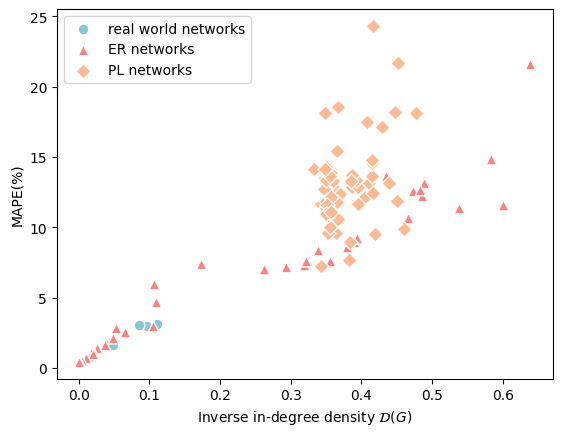

In [55]:
plt.scatter(np.mean(dict_results[('real','inv_deg')],axis=1), np.mean(dict_results[('real','mape')],axis=1), c='#8ac6d1', marker='o', edgecolor='white', s=60, label='real world networks')
plt.scatter(np.mean(dict_results[('1_n11','inv_deg')],axis=1), np.mean(dict_results[('1_n11','mape')],axis=1), c='#ff8080', marker='^', edgecolor='white', s=60, label='ER networks')
plt.scatter(np.mean(dict_results[('1_n','inv_deg')],axis=1), np.mean(dict_results[('1_n','mape')],axis=1), c='#ff8080', marker='^', edgecolor='white', s=60)
plt.scatter(np.mean(dict_results[('logn2_n','inv_deg')],axis=1), np.mean(dict_results[('logn2_n','mape')],axis=1), c='#ff8080', marker='^', edgecolor='white', s=60)
plt.scatter(np.mean(dict_results[('1','inv_deg')],axis=1), np.mean(dict_results[('1','mape')],axis=1), c='#ff8080', marker='^', edgecolor='white', s=60)
plt.scatter(np.mean(dict_results[(1000,'inv_deg')],axis=1), np.mean(dict_results[(1000,'mape')],axis=1), c='#ff8080', marker='^', edgecolor='white', s=60)
plt.scatter(np.mean(dict_results[('25','inv_deg')],axis=1), np.mean(dict_results[('25','mape')],axis=1), c='#ffba92', marker='D', edgecolor='white', s=60, label='PL networks')
plt.scatter(np.mean(dict_results[('30','inv_deg')],axis=1), np.mean(dict_results[('30','mape')],axis=1), c='#ffba92', marker='D', edgecolor='white', s=60)
plt.scatter(np.mean(dict_results[('35','inv_deg')],axis=1), np.mean(dict_results[('35','mape')],axis=1), c='#ffba92', marker='D', edgecolor='white', s=60)
plt.scatter(np.mean(dict_results[('neg05','inv_deg')],axis=1), np.mean(dict_results[('neg05','mape')],axis=1), c='#ffba92', marker='D', edgecolor='white', s=60)
plt.scatter(np.mean(dict_results[('pos05','inv_deg')],axis=1), np.mean(dict_results[('pos05','mape')],axis=1), c='#ffba92', marker='D', edgecolor='white', s=60)
plt.scatter(np.mean(dict_results[('neg10','inv_deg')],axis=1), np.mean(dict_results[('neg10','mape')],axis=1), c='#ffba92', marker='D', edgecolor='white', s=60)
plt.scatter(np.mean(dict_results[('pos10','inv_deg')],axis=1), np.mean(dict_results[('pos10','mape')],axis=1), c='#ffba92', marker='D', edgecolor='white', s=60)

plt.xlabel('Inverse in-degree density $\\mathcal{D}(G)$')
plt.ylabel('MAPE(%)')
plt.legend()

## __Figure 6__: Mixture scheme with different parameters

In [57]:
for real in l_real:
    for t_iter in l_t_iter:
        for i in range(1,rep+1):
            os.makedirs(f'../instances/{real}_re_cal_{t_iter}/sim_{i}', exist_ok=True)
            params = {'sim_id':f'{real}_re_cal_{t_iter}/sim_{i}', 'alpha':0.1, 'beta':3.5,
                      'noise_dist': 'logistic', 'noise_dist_param':1,
                      'cnt_iter': 100000, 't_warmup':1000, 'is_traj':False, 
                      'network_type': 'ER',
                      'is_network_given':True, 'network_dir':f'../instances/{real}/sim_{i}/edge.csv',
                      'is_value_given':True, 'value_dir':f'../instances/{real}/sim_{i}/v.csv'
                     }
            
            G = network(params)
            sample = diffusion_simulation(G,params)
            sample.run_fixed_point()
            sample.re_cal(t_iter = t_iter)
            sample.output()

Instance generated with 770 nodes.
Instance generated with 770 nodes.
Instance generated with 963 nodes.
Instance generated with 963 nodes.
Instance generated with 1447 nodes.
Instance generated with 1447 nodes.
Instance generated with 1519 nodes.
Instance generated with 1519 nodes.
Instance generated with 2236 nodes.
Instance generated with 2236 nodes.


In [58]:
dict_results = dict()

for real in ['caltech', 'amherst']:
    for t_iter in l_t_iter:
        rec_mape_re_cal = []
        for d in range(200):
            mape = []
            for i in range(1,rep+1):
                df = pd.read_csv(f'../instances/{real}/sim_{i}/results.csv')
                df_re_cal = pd.read_csv(f'../instances/{real}_re_cal_{t_iter}/sim_{i}/results.csv')
                if len(df)>len(df_re_cal):
                    df = df[:len(df_re_cal)]
                diff = (np.abs(df['sim']-df['fp'])/df['sim']).values
                diff_re_cal = (np.abs(df['sim']-df_re_cal['p_re'])/df['sim']).values
                not_low_deg = (df_re_cal['in_deg']>d).values
                diff_re_cal[not_low_deg] =  diff[not_low_deg]
                mape.append(np.mean(diff_re_cal)*100)
            rec_mape_re_cal.append(mape)
        dict_results[(real,'mix', t_iter)] = rec_mape_re_cal

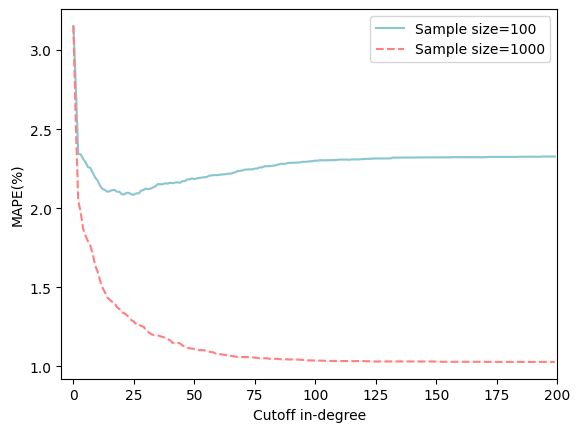

In [59]:
plt.plot(range(200), np.mean(dict_results[('caltech','mix', 100)], axis=1), c='#8ac6d1', label = 'Sample size=100')
plt.plot(range(200), np.mean(dict_results[('caltech','mix', 1000)], axis=1), c='#ff8080', linestyle='--', label = 'Sample size=1000')
plt.fill_between(range(200), np.quantile(dict_results[('caltech','mix', 100)], 0.05, axis=1), np.quantile(dict_results[('caltech','mix', 100)], 0.95, axis=1), color='#8ac6d1', alpha=0.1)
plt.fill_between(range(200), np.quantile(dict_results[('caltech','mix', 1000)], 0.05, axis=1), np.quantile(dict_results[('caltech','mix', 1000)], 0.95, axis=1), color='#ff8080', alpha=0.1)
plt.xlabel('Cutoff in-degree')
plt.ylabel('MAPE(%)')
plt.xlim(-5,200)
plt.legend()

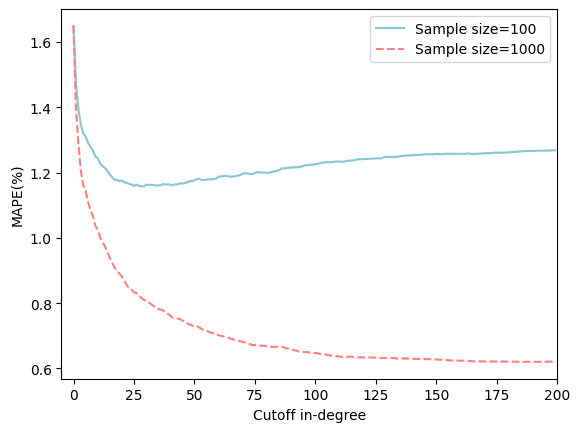

In [60]:
plt.plot(range(200), np.mean(dict_results[('amherst','mix', 100)], axis=1), c='#8ac6d1', label = 'Sample size=100')
plt.plot(range(200), np.mean(dict_results[('amherst','mix', 1000)], axis=1), c='#ff8080', linestyle='--', label = 'Sample size=1000')
plt.fill_between(range(200), np.quantile(dict_results[('amherst','mix', 100)], 0.05, axis=1), np.quantile(dict_results[('amherst','mix', 100)], 0.95, axis=1), color='#8ac6d1', alpha=0.1)
plt.fill_between(range(200), np.quantile(dict_results[('amherst','mix', 1000)], 0.05, axis=1), np.quantile(dict_results[('amherst','mix', 1000)], 0.95, axis=1), color='#ff8080', alpha=0.1)
plt.xlabel('Cutoff in-degree')
plt.ylabel('MAPE(%)')
plt.xlim(-5,200)
plt.legend()

## __Figure 7__: Mixture Scheme

### Generate mixture results for all networks

In [62]:
for n in l_n:
    for pn in l_pn1:
        for t_iter in l_t_iter:
            for i in range(1,rep+1):
                os.makedirs(f'../instances/ER_{pn}_re_cal_{t_iter}/n{n}_{i}', exist_ok=True)
                params = {'sim_id':f'ER_{pn}_re_cal_{t_iter}/n{n}_{i}', 'alpha':0.1, 'beta':3.5,
                          'noise_dist': 'logistic', 'noise_dist_param':1,
                          'cnt_iter': 100000, 't_warmup':1000, 'is_traj':False, 
                          'network_type': 'ER',
                          'is_network_given':True, 'network_dir':f'../instances/ER_{pn}/n{n}_{i}/edge.csv',
                          'is_value_given':True, 'value_dir':f'../instances/ER_{pn}/n{n}_{i}/v.csv'
                         }
                
                G = network(params)
                sample = diffusion_simulation(G,params)
                sample.run_fixed_point()
                sample.re_cal(t_iter = t_iter)
                sample.output()

Instance generated with 20 nodes.
Instance generated with 20 nodes.
Instance generated with 20 nodes.
Instance generated with 20 nodes.
Instance generated with 20 nodes.
Instance generated with 20 nodes.
Instance generated with 20 nodes.
Instance generated with 20 nodes.
Instance generated with 50 nodes.
Instance generated with 50 nodes.
Instance generated with 50 nodes.
Instance generated with 50 nodes.
Instance generated with 50 nodes.
Instance generated with 50 nodes.
Instance generated with 50 nodes.
Instance generated with 50 nodes.
Instance generated with 100 nodes.
Instance generated with 100 nodes.
Instance generated with 100 nodes.
Instance generated with 100 nodes.
Instance generated with 100 nodes.
Instance generated with 100 nodes.
Instance generated with 100 nodes.
Instance generated with 100 nodes.
Instance generated with 199 nodes.
Instance generated with 199 nodes.
Instance generated with 200 nodes.
Instance generated with 200 nodes.
Instance generated with 200 nodes.
I

In [63]:
n = 1000
for pn in l_pn2:
    for t_iter in l_t_iter:
        for i in range(1,rep+1):
            os.makedirs(f'../instances/ER_{pn}_re_cal_{t_iter}/n{n}_{i}', exist_ok=True)
            params = {'sim_id':f'ER_{pn}_re_cal_{t_iter}/n{n}_{i}', 'alpha':0.1, 'beta':3.5,
                      'noise_dist': 'logistic', 'noise_dist_param':1,
                      'cnt_iter': 100000, 't_warmup':1000, 'is_traj':False, 
                      'network_type': 'ER',
                      'is_network_given':True, 'network_dir':f'../instances/ER_{pn}/n{n}_{i}/edge.csv',
                      'is_value_given':True, 'value_dir':f'../instances/ER_{pn}/n{n}_{i}/v.csv'
                      }
                
            G = network(params)
            sample = diffusion_simulation(G,params)
            sample.run_fixed_point()
            sample.re_cal(t_iter = t_iter)
            sample.output()

Instance generated with 999 nodes.
Instance generated with 999 nodes.
Instance generated with 1000 nodes.
Instance generated with 1000 nodes.
Instance generated with 1000 nodes.
Instance generated with 1000 nodes.


In [64]:
alpha = '25'
for theta in l_theta:
    for n in l_n:
        for t_iter in l_t_iter:
            for i in range(1,rep+1):
                os.makedirs(f'../instances/PL_alpha{alpha}_theta{theta}_re_cal_{t_iter}/n{n}_{i}', exist_ok=True)
                params = {'sim_id':f'PL_alpha{alpha}_theta{theta}_re_cal_{t_iter}/n{n}_{i}', 'alpha':0.1, 'beta':3.5,
                          'noise_dist': 'logistic', 'noise_dist_param':1,
                          'cnt_iter': 100000, 't_warmup':1000, 'is_traj':False, 
                          'network_type': 'PL',
                          'is_network_given':True, 'network_dir':f'../instances/PL_alpha{alpha}_theta{theta}/n{n}_{i}/edge.csv',
                          'is_value_given':True, 'value_dir':f'../instances/PL_alpha{alpha}_theta{theta}/n{n}_{i}/v.csv'
                         }
                
                G = network(params)
                sample = diffusion_simulation(G,params)
                sample.run_fixed_point()
                sample.re_cal(t_iter = t_iter)
                sample.output()

Instance generated with 20 nodes.
Instance generated with 20 nodes.
Instance generated with 50 nodes.
Instance generated with 50 nodes.
Instance generated with 100 nodes.
Instance generated with 100 nodes.
Instance generated with 200 nodes.
Instance generated with 200 nodes.
Instance generated with 500 nodes.
Instance generated with 500 nodes.
Instance generated with 1000 nodes.
Instance generated with 1000 nodes.
Instance generated with 2000 nodes.
Instance generated with 2000 nodes.
Instance generated with 5000 nodes.
Instance generated with 5000 nodes.
Instance generated with 10000 nodes.
Instance generated with 10000 nodes.
Instance generated with 20 nodes.
Instance generated with 20 nodes.
Instance generated with 50 nodes.
Instance generated with 50 nodes.
Instance generated with 100 nodes.
Instance generated with 100 nodes.
Instance generated with 200 nodes.
Instance generated with 200 nodes.
Instance generated with 500 nodes.
Instance generated with 500 nodes.
Instance generated

In [65]:
theta = '0'
for alpha in l_alpha:
    for n in l_n:
        for t_iter in l_t_iter:
            for i in range(1,rep+1):
                os.makedirs(f'../instances/PL_alpha{alpha}_theta{theta}_re_cal_{t_iter}/n{n}_{i}', exist_ok=True)
                params = {'sim_id':f'../instances/PL_alpha{alpha}_theta{theta}_re_cal_{t_iter}/n{n}_{i}', 'alpha':0.1, 'beta':3.5,
                          'noise_dist': 'logistic', 'noise_dist_param':1,
                          'cnt_iter': 100000, 't_warmup':1000, 'is_traj':False, 
                          'network_type': 'PL',
                          'is_network_given':True, 'network_dir':f'../instances/PL_alpha{alpha}_theta{theta}/n{n}_{i}/edge.csv',
                          'is_value_given':True, 'value_dir':f'../instances/PL_alpha{alpha}_theta{theta}/n{n}_{i}/v.csv'
                         }
                
                G = network(params)
                sample = diffusion_simulation(G,params)
                sample.run_fixed_point()
                sample.re_cal(t_iter = t_iter)
                sample.output()

Instance generated with 20 nodes.
Instance generated with 20 nodes.
Instance generated with 50 nodes.
Instance generated with 50 nodes.
Instance generated with 100 nodes.
Instance generated with 100 nodes.
Instance generated with 200 nodes.
Instance generated with 200 nodes.
Instance generated with 500 nodes.
Instance generated with 500 nodes.
Instance generated with 1000 nodes.
Instance generated with 1000 nodes.
Instance generated with 2000 nodes.
Instance generated with 2000 nodes.
Instance generated with 5000 nodes.
Instance generated with 5000 nodes.
Instance generated with 10000 nodes.
Instance generated with 10000 nodes.
Instance generated with 20 nodes.
Instance generated with 20 nodes.
Instance generated with 50 nodes.
Instance generated with 50 nodes.
Instance generated with 100 nodes.
Instance generated with 100 nodes.
Instance generated with 200 nodes.
Instance generated with 200 nodes.
Instance generated with 500 nodes.
Instance generated with 500 nodes.
Instance generated

### Achieve the results from all networks

In [66]:
dict_results = dict()

for t_iter in l_t_iter:
    rec_mape, rec_mape_recal = [], []
    if t_iter == 100:
        d = 20
    else:
        d = 200
    for real in l_real:
        mape, mape_recal  = [], []
        for i in range(1,rep+1):
            df = pd.read_csv(f'../instances/{real}/sim_{i}/results.csv')
            mape.append(np.mean(abs(df['sim']-df['fp'])/df['sim'])*100)
                
            df_re_cal = pd.read_csv(f'../instances/{real}_re_cal_{t_iter}/sim_{i}/results.csv')
            if len(df)>len(df_re_cal):
                df = df[:len(df_re_cal)]
            diff = (np.abs(df['sim']-df['fp'])/df['sim']).values
            diff_re_cal = (np.abs(df['sim']-df_re_cal['p_re'])/df['sim']).values
            not_low_deg = (df_re_cal['in_deg']>d).values
            diff_re_cal[not_low_deg] =  diff[not_low_deg]
            mape_recal.append(np.mean(diff_re_cal)*100)
        
        rec_mape.append(mape)
        rec_mape_recal.append(mape_recal)

    dict_results[('real','fpa')] = rec_mape
    dict_results[('real','mix', t_iter)] = rec_mape_recal
    

In [67]:
for t_iter in l_t_iter:
    if t_iter == 100:
        d = 20
    else:
        d = 200
    for pn in l_pn1:
        rec_mape, rec_mape_recal = [], []
        for n in l_n:
            mape, mape_recal  = [], []
            for i in range(1,rep+1):
                df = pd.read_csv(f'../instances/ER_{pn}/n{n}_{i}/results.csv')
                mape.append(np.mean(abs(df['sim']-df['fp'])/df['sim'])*100)
                    
                df_re_cal = pd.read_csv(f'../instances/ER_{pn}_re_cal_{t_iter}/n{n}_{i}/results.csv')
                if len(df)>len(df_re_cal):
                    df = df[:len(df_re_cal)]
                diff = (np.abs(df['sim']-df['fp'])/df['sim']).values
                diff_re_cal = (np.abs(df['sim']-df_re_cal['p_re'])/df['sim']).values
                not_low_deg = (df_re_cal['in_deg']>d).values
                diff_re_cal[not_low_deg] =  diff[not_low_deg]
                mape_recal.append(np.mean(diff_re_cal)*100)
                
            rec_mape.append(mape)
            rec_mape_recal.append(mape_recal)
    
        dict_results[(pn, 'fpa')] = rec_mape
        dict_results[(pn, 'mix', t_iter)] = rec_mape_recal
    

In [68]:
n = 1000
for t_iter in l_t_iter:
    if t_iter == 100:
        d = 20
    else:
        d = 200
    
    rec_mape, rec_mape_recal = [], []
    for pn in l_pn2:
        mape, mape_recal  = [], []
        for i in range(1,rep+1):
            df = pd.read_csv(f'../instances/ER_{pn}/n{n}_{i}/results.csv')
            mape.append(np.mean(abs(df['sim']-df['fp'])/df['sim'])*100)
                    
            df_re_cal = pd.read_csv(f'../instances/ER_{pn}_re_cal_{t_iter}/n{n}_{i}/results.csv')
            if len(df)>len(df_re_cal):
                df = df[:len(df_re_cal)]
            diff = (np.abs(df['sim']-df['fp'])/df['sim']).values
            diff_re_cal = (np.abs(df['sim']-df_re_cal['p_re'])/df['sim']).values
            not_low_deg = (df_re_cal['in_deg']>d).values
            diff_re_cal[not_low_deg] =  diff[not_low_deg]
            mape_recal.append(np.mean(diff_re_cal)*100)
                
        rec_mape.append(mape)
        rec_mape_recal.append(mape_recal)
    
    dict_results[(n, 'fpa')] = rec_mape
    dict_results[(n, 'mix', t_iter)] = rec_mape_recal
    

In [69]:
theta = '0'

for t_iter in l_t_iter:
    if t_iter == 100:
        d = 20
    else:
        d = 200
    for alpha in l_alpha:
        rec_mape, rec_mape_recal = [], []
        for n in l_n:
            mape, mape_recal  = [], []
            for i in range(1,rep+1):
                df = pd.read_csv(f'../instances/PL_alpha{alpha}_theta{theta}/n{n}_{i}/results.csv')
                mape.append(np.mean(abs(df['sim']-df['fp'])/df['sim'])*100)
                    
                df_re_cal = pd.read_csv(f'../instances/PL_alpha{alpha}_theta{theta}_re_cal_{t_iter}/n{n}_{cnt}/results.csv')
                if len(df)>len(df_re_cal):
                    df = df[:len(df_re_cal)]
                diff = (np.abs(df['sim']-df['fp'])/df['sim']).values
                diff_re_cal = (np.abs(df['sim']-df_re_cal['p_re'])/df['sim']).values
                not_low_deg = (df_re_cal['in_deg']>d).values
                diff_re_cal[not_low_deg] =  diff[not_low_deg]
                mape_recal.append(np.mean(diff_re_cal)*100)
                
            rec_mape.append(mape)
            rec_mape_recal.append(mape_recal)
    
        dict_results[(alpha, 'fpa')] = rec_mape
        dict_results[(alpha, 'mix', t_iter)] = rec_mape_recal
    

In [70]:
alpha = '25'

for t_iter in l_t_iter:
    if t_iter == 100:
        d = 20
    else:
        d = 200
    for theta in l_theta:
        rec_mape, rec_mape_recal = [], []
        for n in l_n:
            mape, mape_recal  = [], []
            for i in range(1,rep+1):
                df = pd.read_csv(f'../instances/PL_alpha{alpha}_theta{theta}/n{n}_{i}/results.csv')
                mape.append(np.mean(abs(df['sim']-df['fp'])/df['sim'])*100)
                    
                df_re_cal = pd.read_csv(f'../instances/PL_alpha{alpha}_theta{theta}_re_cal_{t_iter}/n{n}_{i}/results.csv')
                if len(df)>len(df_re_cal):
                    df = df[:len(df_re_cal)]
                diff = (np.abs(df['sim']-df['fp'])/df['sim']).values
                diff_re_cal = (np.abs(df['sim']-df_re_cal['p_re'])/df['sim']).values
                not_low_deg = (df_re_cal['in_deg']>d).values
                diff_re_cal[not_low_deg] =  diff[not_low_deg]
                mape_recal.append(np.mean(diff_re_cal)*100)
                
            rec_mape.append(mape)
            rec_mape_recal.append(mape_recal)
    
        dict_results[(theta, 'fpa')] = rec_mape
        dict_results[(theta, 'mix', t_iter)] = rec_mape_recal
        
    

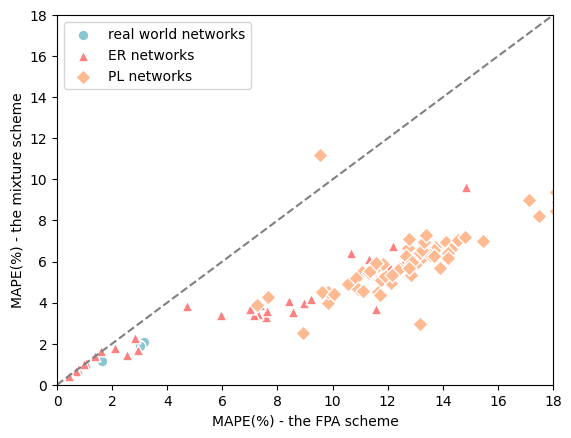

In [71]:
t_iter = 100

plt.scatter(np.mean(dict_results[('real','fpa')],axis=1), np.mean(dict_results[('real','mix', t_iter)],axis=1), c='#8ac6d1', marker='o', edgecolor='white', s=60, label='real world networks')
plt.scatter(np.mean(dict_results[('1_n11','fpa')],axis=1), np.mean(dict_results[('1_n11','mix', t_iter)],axis=1), c='#ff8080', marker='^', edgecolor='white', s=60, label='ER networks')
plt.scatter(np.mean(dict_results[('1_n','fpa')],axis=1), np.mean(dict_results[('1_n','mix', t_iter)],axis=1), c='#ff8080', marker='^', edgecolor='white', s=60)
plt.scatter(np.mean(dict_results[('logn2_n','fpa')],axis=1), np.mean(dict_results[('logn2_n','mix', t_iter)],axis=1), c='#ff8080', marker='^', edgecolor='white', s=60)
plt.scatter(np.mean(dict_results[('1','fpa')],axis=1), np.mean(dict_results[('1','mix', t_iter)],axis=1), c='#ff8080', marker='^', edgecolor='white', s=60)
plt.scatter(np.mean(dict_results[(1000,'fpa')],axis=1), np.mean(dict_results[(1000,'mix', t_iter)],axis=1), c='#ff8080', marker='^', edgecolor='white', s=60)
plt.scatter(np.mean(dict_results[('25','fpa')],axis=1), np.mean(dict_results[('25','mix', t_iter)],axis=1), c='#ffba92', marker='D', edgecolor='white', s=60, label='PL networks')
plt.scatter(np.mean(dict_results[('30','fpa')],axis=1), np.mean(dict_results[('30','mix', t_iter)],axis=1), c='#ffba92', marker='D', edgecolor='white', s=60)
plt.scatter(np.mean(dict_results[('35','fpa')],axis=1), np.mean(dict_results[('35','mix', t_iter)],axis=1), c='#ffba92', marker='D', edgecolor='white', s=60)
plt.scatter(np.mean(dict_results[('neg05','fpa')],axis=1), np.mean(dict_results[('neg05','mix', t_iter)],axis=1), c='#ffba92', marker='D', edgecolor='white', s=60)
plt.scatter(np.mean(dict_results[('pos05','fpa')],axis=1), np.mean(dict_results[('pos05','mix', t_iter)],axis=1), c='#ffba92', marker='D', edgecolor='white', s=60)
plt.scatter(np.mean(dict_results[('neg10','fpa')],axis=1), np.mean(dict_results[('neg10','mix', t_iter)],axis=1), c='#ffba92', marker='D', edgecolor='white', s=60)
plt.scatter(np.mean(dict_results[('pos10','fpa')],axis=1), np.mean(dict_results[('pos10','mix', t_iter)],axis=1), c='#ffba92', marker='D', edgecolor='white', s=60)
plt.plot([0,18],[0,18],c='gray', linestyle='--')

plt.xlabel('MAPE(%) - the FPA scheme')
plt.ylabel('MAPE(%) - the mixture scheme')
plt.xlim(0,18)
plt.ylim(0,18)
plt.legend()

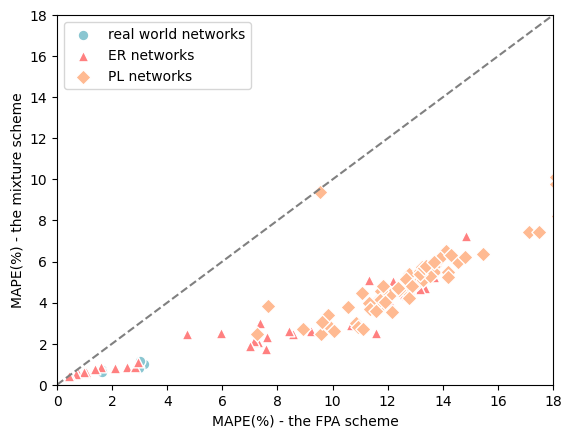

In [72]:
t_iter = 1000

plt.scatter(np.mean(dict_results[('real','fpa')],axis=1), np.mean(dict_results[('real','mix', t_iter)],axis=1), c='#8ac6d1', marker='o', edgecolor='white', s=60, label='real world networks')
plt.scatter(np.mean(dict_results[('1_n11','fpa')],axis=1), np.mean(dict_results[('1_n11','mix', t_iter)],axis=1), c='#ff8080', marker='^', edgecolor='white', s=60, label='ER networks')
plt.scatter(np.mean(dict_results[('1_n','fpa')],axis=1), np.mean(dict_results[('1_n','mix', t_iter)],axis=1), c='#ff8080', marker='^', edgecolor='white', s=60)
plt.scatter(np.mean(dict_results[('logn2_n','fpa')],axis=1), np.mean(dict_results[('logn2_n','mix', t_iter)],axis=1), c='#ff8080', marker='^', edgecolor='white', s=60)
plt.scatter(np.mean(dict_results[('1','fpa')],axis=1), np.mean(dict_results[('1','mix', t_iter)],axis=1), c='#ff8080', marker='^', edgecolor='white', s=60)
plt.scatter(np.mean(dict_results[(1000,'fpa')],axis=1), np.mean(dict_results[(1000,'mix', t_iter)],axis=1), c='#ff8080', marker='^', edgecolor='white', s=60)
plt.scatter(np.mean(dict_results[('25','fpa')],axis=1), np.mean(dict_results[('25','mix', t_iter)],axis=1), c='#ffba92', marker='D', edgecolor='white', s=60, label='PL networks')
plt.scatter(np.mean(dict_results[('30','fpa')],axis=1), np.mean(dict_results[('30','mix', t_iter)],axis=1), c='#ffba92', marker='D', edgecolor='white', s=60)
plt.scatter(np.mean(dict_results[('35','fpa')],axis=1), np.mean(dict_results[('35','mix', t_iter)],axis=1), c='#ffba92', marker='D', edgecolor='white', s=60)
plt.scatter(np.mean(dict_results[('neg05','fpa')],axis=1), np.mean(dict_results[('neg05','mix', t_iter)],axis=1), c='#ffba92', marker='D', edgecolor='white', s=60)
plt.scatter(np.mean(dict_results[('pos05','fpa')],axis=1), np.mean(dict_results[('pos05','mix', t_iter)],axis=1), c='#ffba92', marker='D', edgecolor='white', s=60)
plt.scatter(np.mean(dict_results[('neg10','fpa')],axis=1), np.mean(dict_results[('neg10','mix', t_iter)],axis=1), c='#ffba92', marker='D', edgecolor='white', s=60)
plt.scatter(np.mean(dict_results[('pos10','fpa')],axis=1), np.mean(dict_results[('pos10','mix', t_iter)],axis=1), c='#ffba92', marker='D', edgecolor='white', s=60)
plt.plot([0,18],[0,18],c='gray', linestyle='--')

plt.xlabel('MAPE(%) - the FPA scheme')
plt.ylabel('MAPE(%) - the mixture scheme')
plt.xlim(0,18)
plt.ylim(0,18)
plt.legend()